In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [184]:
df =pd.read_csv("file.csv")
df=df.dropna()
X=df.iloc[:, 1:-1]
y=df.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
display(X_train)
display(y_train)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


,medv
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [186]:
n=len(X_train)
m=len(X_train.columns)
itr=10000
rate=0.001
w=np.zeros((m,1))
b=np.zeros(1)
y_pred=np.zeros((n,1))

In [187]:
from sklearn.preprocessing import StandardScaler
sta = StandardScaler()
X_train.iloc[:, :-1] = sta.fit_transform(X_train.iloc[:, :-1])
X_test.iloc[:, :-1] = sta.transform(X_test.iloc[:, :-1])
y_train.iloc[:, -1:] = sta.fit_transform(y_train.iloc[:, -1:])
y_test.iloc[:, -1:] = sta.transform(y_test.iloc[:, -1:])

/tmp/ipython-input-2981896173.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871
 -0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871
 -0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871
 -0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871
 -0.27808871 -0.27808871  3.59597476 -0.27808871 -0.27808871 -0.27808871
 -0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871
 -0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871  3.59597476
 -0.27808871 -0.27808871  3.59597476 -0.27808871 -0.27808871 -0.27808871
 -0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871
 -0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871
 -0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871 -0.27808871
 -0.27808871 -0.27808871 -0.27808871 -0.278

In [188]:
def grad_desc(n,itr,rate,x,y,w,b):
  error_list=[]
  y=np.array(y)
  y_pred=np.zeros((n,1))
  for i in range (itr):
    y_pred=np.dot(x,w)+b
    err=(1/(2*n))*np.sum(np.square(y_pred-y))
    dw=(1/n)*np.matmul(x.T, (y_pred-y))
    db=(1/n)*np.sum(y_pred-y)
    w=w-rate*dw
    b=b-rate*db
    error_list.append(err)
  y_pred=np.dot(x,w)+b
  return (w,b,error_list, y_pred)

In [189]:
w,b,error_list, y_pred = grad_desc(n,itr,rate,X_train,y_train,w,b)
y_train=np.array(y_train)
for k in range (n):
  print (y_train[k],"\t\t" ,y_pred[k])
for i in range (itr):
  if (i%(itr/10)==0):
    print ("err number ",i,":",error_list[i])
print ("......................................")
print ("final error: ",error_list[-1])



[-1.1583531] 		 [-1.29672117]
[-0.3107673] 		 [-0.40669865]
[-0.36441197] 		 [0.03173185]
[-1.00814802] 		 [-1.14992702]
[-0.49315918] 		 [-0.51875038]
[0.19349261] 		 [0.25819731]
[-0.18202009] 		 [-0.25305104]
[0.20422154] 		 [0.09911469]
[-1.51240792] 		 [-1.54612807]
[0.5046317] 		 [-0.34096025]
[-0.22493582] 		 [-0.13024122]
[1.43804897] 		 [0.41639883]
[0.944518] 		 [0.98597174]
[-1.1905399] 		 [-0.90439909]
[1.82429061] 		 [1.34994429]
[-0.95450335] 		 [-1.05028127]
[-0.10691755] 		 [-0.2371876]
[0.0969322] 		 [0.55198289]
[-0.55753278] 		 [-0.82214273]
[0.17203474] 		 [0.18773956]
[-1.50167899] 		 [-1.96701002]
[-0.38586984] 		 [0.0744995]
[0.26859515] 		 [0.27050598]
[-0.25712263] 		 [-0.04134143]
[0.0325586] 		 [0.16682686]
[1.62044086] 		 [1.09915483]
[-0.77211147] 		 [-0.27776208]
[2.42511092] 		 [1.6900634]
[-0.76138253] 		 [-0.93459321]
[-0.02108607] 		 [0.34631664]
[-0.89012974] 		 [-0.53307354]
[-0.43951451] 		 [-0.15395035]
[-0.53607491] 		 [-1.2943386]
[-0.7184668] 		

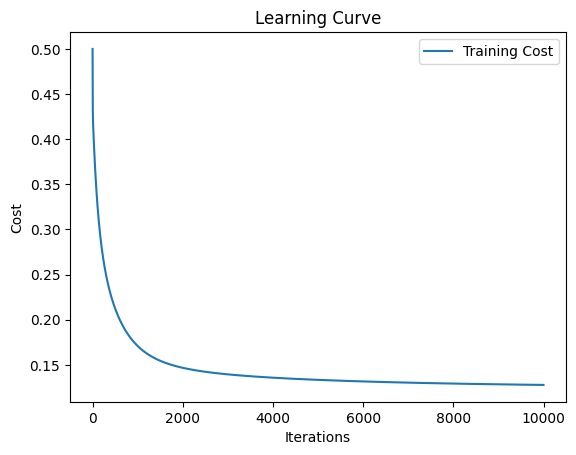

In [190]:
#Plotting learning curve
plt.plot(error_list, label="Training Cost")
#plt.scatter(np.arange(1,itr+1),error_list, label="Training Cost", color="red")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Learning Curve")
plt.legend()
plt.show()

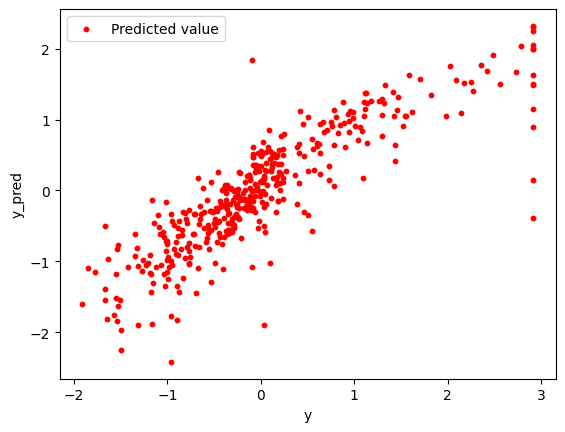

In [191]:
# plt.plot(y_train,y_train, label="actual value", color="blue")
plt.scatter(y_train,y_pred, label="Predicted value", color="red", s=10)
plt.xlabel("y")
plt.ylabel("y_pred")
plt.legend()
plt.show()

TEST

In [192]:
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)
y_pred_test = np.dot(X_test_np, w) + b

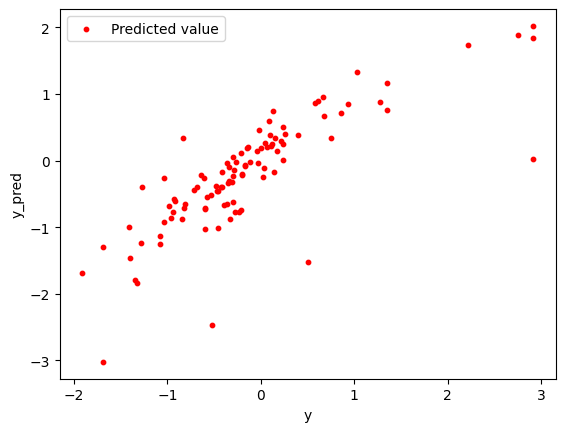

In [193]:
plt.scatter(y_test_np,y_pred_test, label="Predicted value", color="red", s=10)
plt.xlabel("y")
plt.ylabel("y_pred")
plt.legend()
plt.show()

In [194]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_np, y_pred_test)
print(f"Test Mean Squared Error (MSE): {mse}")
r2 = r2_score(y_test_np, y_pred_test)
print(f"Test R-squared (R2) Score: {r2}")

Test Mean Squared Error (MSE): 0.30202133215872634
Test R-squared (R2) Score: 0.6422164516259589
